<a href="https://colab.research.google.com/github/priyanshgupta1998/Natural-language-processing-NLP-/blob/master/Spam_Detection_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SMS Spam Collection Dataset
Collection of SMS messages tagged as spam or legitimate

In [34]:
from google.colab import files
files.upload()
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d uciml/sms-spam-collection-dataset

Saving kaggle.json to kaggle (1).json
sms-spam-collection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!unzip sms-spam-collection-dataset.zip

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [37]:
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
print(df.shape)
df.head()

(5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [38]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [39]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Text(0.5, 1.0, 'Number of ham and spam messages')

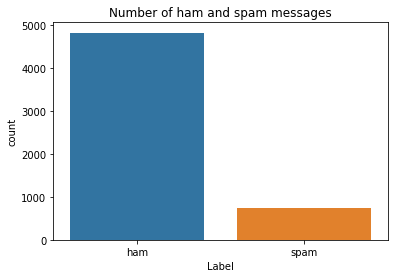

In [40]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [0]:
X = df.v2
Y = df.v1


In [0]:
le = LabelEncoder()
Y = le.fit_transform(Y)

In [43]:
print(Y.shape)
Y[:5]

(5572,)


array([0, 0, 1, 0, 0])

In [44]:
Y = Y.reshape(-1,1)   #Convert into 2 dimensional array
print(Y.shape)

(5572, 1)


In [45]:
Y[:5]

array([[0],
       [0],
       [1],
       [0],
       [0]])

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

#Process the data
* Tokenize the data and convert the text to sequences.   
* Add padding to ensure that all the sequences "have the same shape".
* There are many ways of taking the max_len and here an arbitrary length of 150 is chosen.

In [0]:
"from keras.preprocessing.text import Tokenizer
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)

In [48]:
print(len(X_train))
print(len(sequences ))
print(sequences)
print("word_index : ",tok.word_index)

4736
4736
[[309, 38, 289, 146], [3, 22, 4, 747, 6, 17, 105, 496, 20, 347, 348, 157, 27, 4, 43, 294, 403, 2, 4, 304, 798, 20, 131], [87, 9, 290, 81, 16, 104], [846, 438, 404, 32, 80, 25, 72, 52, 273, 477], [28, 3, 68, 27, 22, 3, 139, 703, 799], [103, 218, 20, 336, 9, 29, 847, 43, 36, 48, 20, 347, 638, 27, 32, 177, 73, 78, 241, 2, 86, 20], [461, 82, 3, 9, 4, 274], [198, 13, 95, 143, 188, 4, 602, 579, 748, 153, 18, 388, 749, 39, 8, 5, 462, 478, 2, 355, 3, 16, 989, 423, 405], [1, 554, 6, 144, 93, 21, 92, 250, 522], [36, 990, 2, 35, 800, 2, 3], [87, 81, 16, 104, 42, 41, 262], [12, 13, 325, 2, 189, 4, 48, 991, 55, 91, 88, 37], [406, 32, 10, 918, 254, 223, 310, 1, 74, 124, 2, 49, 18, 263, 9], [848, 407, 9, 639, 21, 992], [127, 6, 105], [22, 3, 2, 49, 12, 289], [87, 6, 28, 25, 674, 275, 5, 463, 378, 120, 4, 208, 15, 704, 97, 154, 91, 255, 43, 125, 675], [161, 408, 10, 82, 47, 801, 6, 22, 10, 102, 479, 234, 65, 2, 6], [67, 4, 20, 29, 20, 76, 4, 256, 73, 69, 993, 69, 603, 2, 43, 38, 195], [145, 

In [0]:
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [50]:
print(len(sequences_matrix))
print(sequences_matrix.shape)
print(sequences_matrix)

4736
(4736, 150)
[[  0   0   0 ...  38 289 146]
 [  0   0   0 ... 798  20 131]
 [  0   0   0 ...  81  16 104]
 ...
 [  0   0   0 ...   3 457   2]
 [  0   0   0 ... 121  18 252]
 [  0   0   0 ...   2   4 897]]


In [0]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.models import Model
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [52]:
from keras.optimizers import RMSprop
model = RNN()
print(model.summary())





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
______

In [53]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#Fit on the training data.

In [55]:
model.fit(sequences_matrix,
          Y_train,
          batch_size=128,
          epochs=5,
          validation_split=0.2,
          callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 3788 samples, validate on 948 samples
Epoch 1/5
3788/3788 [==============================] - 10s 3ms/step - loss: 0.0301 - acc: 0.9908 - val_loss: 0.0820 - val_acc: 0.9810
Epoch 2/5
3788/3788 [==============================] - 10s 3ms/step - loss: 0.0257 - acc: 0.9929 - val_loss: 0.0743 - val_acc: 0.9842
Epoch 3/5
3788/3788 [==============================] - 10s 3ms/step - loss: 0.0195 - acc: 0.9931 - val_loss: 0.0823 - val_acc: 0.9831


#Process the test data

In [0]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [57]:
#Evaluate the model on the test set.
accr = model.evaluate(test_sequences_matrix,Y_test)
accr

836/836 [==============================] - 3s 4ms/step


[0.045359829996053, 0.9832535885167464]

In [59]:
print('Test set\n  Loss: {:0.3f}%\n  Accuracy: {:0.3f}%'.format(accr[0]*100,accr[1]*100))

Test set
  Loss: 4.536%
  Accuracy: 98.325%




---



---



---



---



---



#by using another method

In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
%matplotlib inline

In [61]:
sms = df.copy()
print(sms.shape)
sms.head()

(5572, 2)


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
sms = sms.rename(columns = {'v1':'label','v2':'message'})

In [68]:
sms.message.value_counts()[:5]

Sorry, I'll call later                                                                                                                                   30
I cant pick the phone right now. Pls send a message                                                                                                      12
Ok...                                                                                                                                                    10
Okie                                                                                                                                                      4
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!     4
Name: message, dtype: int64

In [65]:
sms.groupby('label').first()

,message
label,
ham,"Go until jurong point, crazy.. Available only ..."
spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [72]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [73]:
sms['length'] = sms['message'].apply(len)
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc76001eb00>,
      dtype=object)

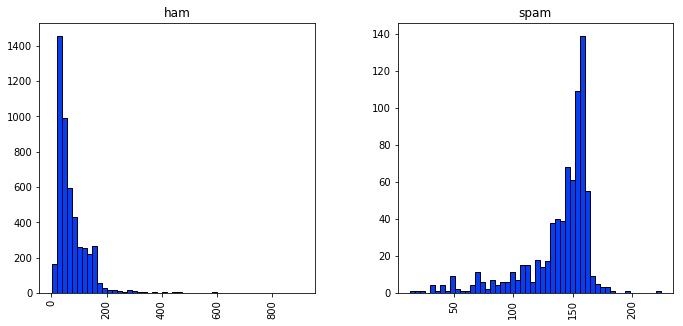

In [74]:
mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
sms.hist(column='length', by='label', bins=50,figsize=(11,5))

`Looks like the lengthy is the message, more likely it is a spam.`

#Text processing and vectorizing our messages

In [0]:
text_feat = sms['message'].copy()

In [0]:
#Remove all the punctuation and redundancy from the message 
def text_process(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]    
    return " ".join(text)

In [87]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
text_feat = text_feat.apply(text_process)

In [89]:
#Word Embedding 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer("english")
vectorizer 

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='english', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
features = vectorizer.fit_transform(text_feat)

In [93]:
features[0].data

array([0.1969634 , 0.34544531, 0.16228383, 0.29183359, 0.32976489,
       0.29183359, 0.23822188, 0.19227005, 0.29183359, 0.26268322,
       0.26752361, 0.27019175, 0.34544531, 0.15705626])

#Classifiers and predictions

In [0]:
features_train, features_test, labels_train, labels_test = train_test_split(features, sms['label'], test_size=0.3, random_state=111)

In [0]:
#Let's import all the classifiers in order to check the btter accuracy 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [0]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [0]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

#Let's make functions to fit our classifiers and make predictions

In [0]:
def train_classifier(clf, feature_train, labels_train):
  clf.fit(feature_train, labels_train)

In [0]:
def predict_labels(clf, features):
    return (clf.predict(features))

In [0]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [103]:
pred_scores

[('SVC', [0.9784688995215312]),
 ('KN', [0.9246411483253588]),
 ('NB', [0.9844497607655502]),
 ('DT', [0.958732057416268]),
 ('LR', [0.9431818181818182]),
 ('RF', [0.9700956937799043]),
 ('AdaBoost', [0.9671052631578947]),
 ('BgC', [0.9671052631578947]),
 ('ETC', [0.9772727272727273])]

In [104]:
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Score
SVC,0.978469
KN,0.924641
NB,0.984450
DT,0.958732
LR,0.943182
RF,0.970096
AdaBoost,0.967105
BgC,0.967105
ETC,0.977273


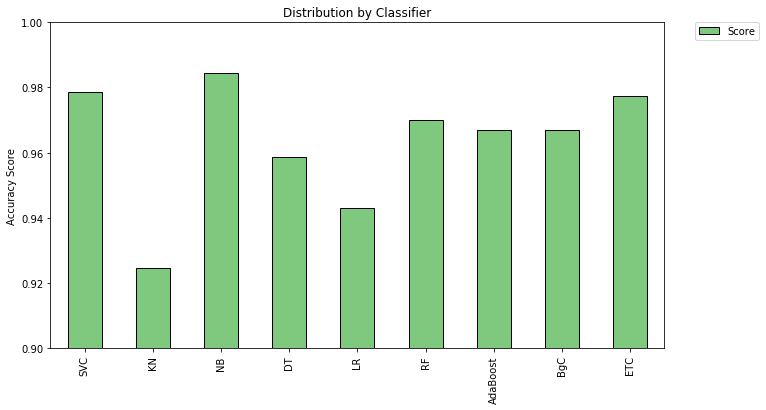

In [105]:
df.plot(kind='bar', ylim=(0.9,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [108]:
text_feat[0]

'Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat'

#Now we are gponna aplly stemming to get the better accuracy

In [0]:
from nltk.stem import SnowballStemmer
#Stemming
def stemmer(text):
    text = text.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words
  

In [0]:
#getting text after stemming 
text_feat = text_feat.apply(stemmer) 

In [0]:
features = vectorizer.fit_transform(text_feat)

In [113]:
features[0].data

array([0.19449555, 0.35011128, 0.16447582, 0.29577542, 0.33421906,
       0.29577542, 0.23792722, 0.19449555, 0.29577542, 0.26623131,
       0.27113709, 0.23906338, 0.35011128, 0.14081218])

In [0]:
features_train, features_test, labels_train, labels_test = train_test_split(features, sms['label'], test_size=0.3, random_state=111)

In [0]:
#Getting score2 after performing stemming
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [116]:
df2 = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score2'])
df = pd.concat([df,df2],axis=1)
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Score,Score2
SVC,0.978469,0.978469
KN,0.924641,0.927632
NB,0.984450,0.985048
DT,0.958732,0.959928
LR,0.943182,0.946770
RF,0.970096,0.974880
AdaBoost,0.967105,0.970096
BgC,0.967105,0.968900
ETC,0.977273,0.977871


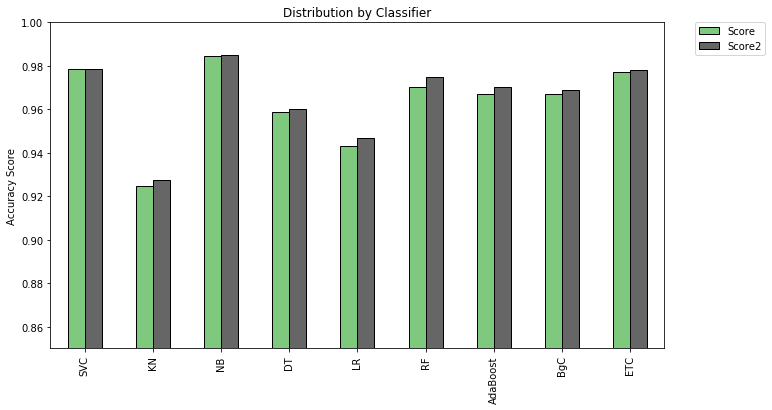

In [117]:
df.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#Getting score by using length of the message and making matrix horizontally

In [118]:
lf = sms['length'].as_matrix() #make one dimensinal array

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [120]:
print(lf.shape)
lf

(5572,)


array([111,  29, 155, ...,  57, 125,  26])

In [0]:
newfeat = np.hstack((features.todense(),lf[:, None]))

In [126]:
print(newfeat.shape)
newfeat

(5572, 8038)


matrix([[  0.,   0.,   0., ...,   0.,   0., 111.],
        [  0.,   0.,   0., ...,   0.,   0.,  29.],
        [  0.,   0.,   0., ...,   0.,   0., 155.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,  57.],
        [  0.,   0.,   0., ...,   0.,   0., 125.],
        [  0.,   0.,   0., ...,   0.,   0.,  26.]])

In [0]:
features_train, features_test, labels_train, labels_test = train_test_split(newfeat, sms['label'], test_size=0.3, random_state=111)

In [0]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [129]:
df3 = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score3'])
df = pd.concat([df,df3],axis=1)
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Score,Score2,Score3
SVC,0.978469,0.978469,0.861244
KN,0.924641,0.927632,0.881579
NB,0.984450,0.985048,0.982656
DT,0.958732,0.959928,0.957536
LR,0.943182,0.946770,0.954545
RF,0.970096,0.974880,0.975478
AdaBoost,0.967105,0.970096,0.961722
BgC,0.967105,0.968900,0.962321
ETC,0.977273,0.977871,0.975478


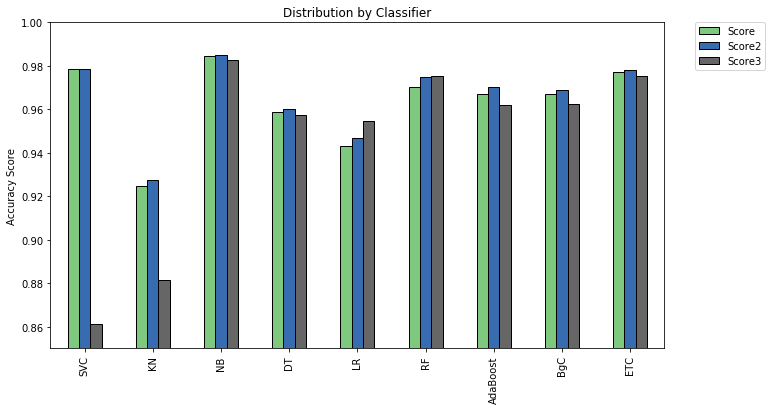

In [130]:
df.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#Voting classifier
`Voting is one of the simplest way of combining the predictions from multiple machine learning algorithms. Voting classifier isn't an actual classifier but it is a wrapper`

In [0]:
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('BgC', bc), ('ETC', etc), ('RF', rfc), ('Ada', abc)], voting='soft')

In [132]:
eclf.fit(features_train,labels_train)

VotingClassifier(estimators=[('BgC',
                              BaggingClassifier(base_estimator=None,
                                                bootstrap=True,
                                                bootstrap_features=False,
                                                max_features=1.0,
                                                max_samples=1.0, n_estimators=9,
                                                n_jobs=None, oob_score=False,
                                                random_state=111, verbose=0,
                                                warm_start=False)),
                             ('ETC',
                              ExtraTreesClassifier(bootstrap=False,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',...


In [0]:
pred = eclf.predict(features_test)

In [135]:
print(accuracy_score(labels_test,pred))

0.979066985645933


#Other Task for understanding

#Keras Tokenizer

In [25]:
from keras.preprocessing.text import Tokenizer
t  = Tokenizer()
fit_text = "The earth is an awesome place live"
t.fit_on_texts(fit_text)
print(t)
test_text = "The earth is an great place live"
sequences = t.texts_to_sequences(test_text)
print(len(test_text))
print(len(sequences ))
print(sequences )
print("word_index : ",t.word_index)   #'e' is is kept at first place because it has more frequency than others ,so it is given number 1

32
32
[[3], [4], [1], [], [1], [2], [8], [3], [4], [], [5], [6], [], [2], [9], [], [], [8], [1], [2], [3], [], [13], [7], [2], [14], [1], [], [7], [5], [15], [1]]
word_index :  {'e': 1, 'a': 2, 't': 3, 'h': 4, 'i': 5, 's': 6, 'l': 7, 'r': 8, 'n': 9, 'w': 10, 'o': 11, 'm': 12, 'p': 13, 'c': 14, 'v': 15}


In [28]:
t  = Tokenizer()
fit_text = "The earth is an awesome place live"
t.fit_on_texts(fit_text)
seq1 = t.texts_to_sequences(fit_text)
print(len(seq1))
print(seq1 )
print("word_index : ",t.word_index)

34
[[3], [4], [1], [], [1], [2], [8], [3], [4], [], [5], [6], [], [2], [9], [], [2], [10], [1], [6], [11], [12], [1], [], [13], [7], [2], [14], [1], [], [7], [5], [15], [1]]
word_index :  {'e': 1, 'a': 2, 't': 3, 'h': 4, 'i': 5, 's': 6, 'l': 7, 'r': 8, 'n': 9, 'w': 10, 'o': 11, 'm': 12, 'p': 13, 'c': 14, 'v': 15}


In [32]:
t  = Tokenizer()
fit_text = ["The earth is an awesome place live"]
t.fit_on_texts(fit_text)

#fit_on_texts fits on sentences when list of sentences is passed to fit_on_texts() function. 
#ie - fit_on_texts( [ sent1, sent2, sent3,....sentN ] )

#Similarly, list of sentences/single sentence in a list must be passed into texts_to_sequences.
test_text1 = "The earth is an great place live"
test_text2 = "The is my program"
sequences = t.texts_to_sequences([test_text1, test_text2])

print('sequences : ',sequences,'\n')

print('word_index : ',t.word_index)
#texts_to_sequences() returns list of list. ie - [ [] ]


sequences :  [[1, 2, 3, 4, 6, 7], [1, 3]] 

word_index :  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


#????

In [122]:
joker = [4,5,8,9,7,8,9]
has = np.array(joker)
print(has.shape)
has   #one dimnesional

(7,)


array([4, 5, 8, 9, 7, 8, 9])

In [123]:
has[:,None]  #This is the way to convert into 2 dimensional or reshaping

array([[4],
       [5],
       [8],
       [9],
       [7],
       [8],
       [9]])